<div style=" background-color: RGB(217, 83, 26);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 - Produisez une étude de marché avec R ou Python</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Préparation, nettoyage et analyse exploratoire des données</h2>
</div>

<div style=" background-color: RGB(217, 146, 26);" >
<div style="border: 1px solid RGB(217, 146, 26);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Importation des librairies</h3>
</div>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

<div style=" background-color: RGB(217, 146, 26);" >
<div style="border: 1px solid RGB(217, 146, 26);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Chargement des fichiers CSV</h3>
</div>

In [2]:
# Importation du fichier dispo alimentaire
dispo_alimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv', sep=",")

# Importation du fichier pop
population = pd.read_csv('Population_2000_2018.csv', sep=",")

<div style="background-color: RGB(217, 117, 26);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">I - Exploration des fichiers </h2>
</div>

In [3]:
# Définir des fonctions utiles au traitement des données
def description_table(data) :
    print('Le fichier comporte {} observation(s) ou article(s).'
      .format(data.shape[0]))
    print('Le fichier comporte {} colonne(s).'
          .format(data.shape[1]), '\n')
    print('\nTypes de données : \n',data.dtypes, '\n')
    print('\nNombre de valeurs uniques : \n',data.nunique(),'\n')
    print(f"\nY a-t-il des doublons : \n {data.duplicated().any()}")
    print(f"\nY a-t-il des valeurs manquantes : \n {data.isna().any()}")
    print(f"\nY a-t-il des valeurs nulles : \n {data.isnull().any()}")
    
# Fonction pour contrôler les manquants du df entier
def manquants(df) :
    return(df.isna().sum())
    
# Fonction pour calculer la proportion de données manquantes
def missing_data(liste_var,df) :
    for var in liste_var :
        print(var,' --- Proportion :',round(((df[var].isna().sum()) / len(df[var]) * 100), 2),'%')

Analyse exploratoire des fichiers

In [4]:
# Visualisation de la table dispo alimentaire
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
# Informations de la table dispo alimentaire
description_table(dispo_alimentaire)

Le fichier comporte 176600 observation(s) ou article(s).
Le fichier comporte 14 colonne(s). 


Types de données : 
 Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object 


Nombre de valeurs uniques : 
 Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur              

In [6]:
# Visualisation de la table population
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
# Informations de la table population
description_table(population)

Le fichier comporte 4411 observation(s) ou article(s).
Le fichier comporte 15 colonne(s). 


Types de données : 
 Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object 


Nombre de valeurs uniques : 
 Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité              

Traitement des fichiers avant jointure

In [8]:
# Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']* 1_000

#Suppression des colonnes inutiles
population = population[['Code zone','Zone','Année','Valeur']]

In [9]:
# Selection du produit à analyser
dispo_volaille = dispo_alimentaire.loc[(dispo_alimentaire['Produit']) == 'Viande de Volailles']

# Selection des colonnes pertinentes
dispo_volaille = dispo_volaille[['Code zone', 'Zone','Élément','Produit','Année','Unité','Valeur']]

# Faire un tableau croisé dynamique
dispo_volaille_pivot = dispo_volaille.pivot_table(index = ['Code zone', 'Zone'],
                                                  columns = ['Élément'], values = 'Valeur').reset_index()

# Visualisation du tableau croisé dynamique
dispo_volaille_pivot.head()

Élément,Code zone,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,1,Arménie,NaN,NaN,NaN,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,0.0,11.0,0.0,NaN,NaN,-2.0
1,2,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
2,3,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,4,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,7,Angola,0.0,NaN,NaN,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,2.0,42.0,0.0,NaN,2.0,0.0


<div style="background-color: RGB(217, 117, 26);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">II - Jointure</h2>
</div>

In [10]:
# Joindre pivot table dispo volaille + population
join_pivot = pd.merge(population.loc[population['Année'] == 2017], 
                                 dispo_volaille_pivot,
                      how="outer",
                      on=('Code zone','Zone'), indicator=True)
join_pivot.head()

,Code zone,Zone,Année,Valeur,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,_merge
0,2,Afghanistan,2017,36296113.0,NaN,NaN,NaN,5.0,1.53,0.33,...,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0,both
1,202,Afrique du Sud,2017,57009756.0,0.0,NaN,NaN,143.0,35.69,9.25,...,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,both
2,3,Albanie,2017,2884169.0,NaN,NaN,NaN,85.0,16.36,6.45,...,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0,both
3,4,Algérie,2017,41389189.0,0.0,NaN,NaN,22.0,6.38,1.50,...,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0,both
4,79,Allemagne,2017,82658409.0,NaN,NaN,NaN,71.0,19.47,4.16,...,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,both


In [11]:
join_pivot._merge.value_counts()

both          172
left_only      64
right_only      0
Name: _merge, dtype: int64

In [12]:
join_pivot_left_only = join_pivot.loc[join_pivot["_merge"] == "left_only"]
print('Les données de dispo alimentaire de viande de volaille ne sont pas disponibles pour les pays ci-dessous :'
      ' \n',join_pivot_left_only["Zone"].unique(),'\n soit', join_pivot_left_only["Zone"].nunique(),'pays.')

Les données de dispo alimentaire de viande de volaille ne sont pas disponibles pour les pays ci-dessous : 
 ['Andorre' 'Anguilla' 'Antilles néerlandaises (ex)' 'Aruba' 'Bahreïn'
 'Bermudes' 'Bhoutan' 'Bonaire, Saint-Eustache et Saba'
 'Brunéi Darussalam' 'Burundi' 'Comores' 'Curaçao' 'Érythrée' 'Gibraltar'
 'Groenland' 'Guadeloupe' 'Guam' 'Guinée équatoriale' 'Guyane française'
 'Île de Man' 'Îles Anglo-Normandes' 'Îles Caïmanes' 'Îles Cook'
 'Îles Falkland (Malvinas)' 'Îles Féroé' 'Îles Mariannes du Nord'
 'Îles Marshall' 'Îles Turques-et-Caïques' 'Îles Vierges américaines'
 'Îles Vierges britanniques' 'Îles Wallis-et-Futuna' 'Libye'
 'Liechtenstein' 'Martinique' 'Mayotte' 'Micronésie (États fédérés de)'
 'Monaco' 'Montserrat' 'Nauru' 'Nioué' 'Palaos' 'Palestine'
 'Papouasie-Nouvelle-Guinée' 'Porto Rico' 'Qatar'
 'République arabe syrienne' 'République démocratique du Congo' 'Réunion'
 'Sahara occidental' 'Saint-Barthélemy'
 'Sainte-Hélène, Ascension et Tristan da Cunha' 'Saint-Marin'

In [13]:
# Ne garder que les both dans le dataframe
join_pivot = join_pivot.loc[join_pivot["_merge"] == "both"]

In [14]:
# Informations sur la jointure avec pivot
description_table(join_pivot)

Le fichier comporte 172 observation(s) ou article(s).
Le fichier comporte 22 colonne(s). 


Types de données : 
 Code zone                                                           int64
Zone                                                               object
Année                                                               int64
Valeur                                                            float64
Alimentation pour touristes                                       float64
Aliments pour animaux                                             float64
Autres utilisations (non alimentaire)                             float64
Disponibilité alimentaire (Kcal/personne/jour)                    float64
Disponibilité alimentaire en quantité (kg/personne/an)            float64
Disponibilité de matière grasse en quantité (g/personne/jour)     float64
Disponibilité de protéines en quantité (g/personne/jour)          float64
Disponibilité intérieure                                          float64

<div style="background-color: RGB(217, 117, 26);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III - Nettoyage - Retraitement et données manquantes</h2>
</div>

In [15]:
# Renommer(synthétiser) les colonnes des deux df de jointure
join_pivot.rename(columns={'Valeur': 'total_pop', 
                     'Alimentation pour touristes':'Touristes', 
                     'Aliments pour animaux': 'Animaux',
                     'Autres utilisations (non alimentaire)': 'Autres utilisations',
                     'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo (Kcal/jour)',
                     'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Dispo (kg/an)',
                     'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Dispo mat. grasses (g/jour)',
                     'Disponibilité de protéines en quantité (g/personne/jour)' : 'Dispo protéines (g/jour)',
                     'Disponibilité intérieure' : 'Dispo int.',
                     'Exportations - Quantité' : 'Export (qté)',
                     'Importations - Quantité': 'Import (qté)'}, inplace = True)

In [16]:
# Supprimer colonne Année de la table pivot
join_pivot = join_pivot.drop(['Année'], axis=1)

In [17]:
# Visualisation de la table pivot (données manquantes et/ou nulles)
join_pivot.head()

,Code zone,Zone,total_pop,Touristes,Animaux,Autres utilisations,Dispo (Kcal/jour),Dispo (kg/an),Dispo mat. grasses (g/jour),Dispo protéines (g/jour),...,Export (qté),Import (qté),Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,_merge
0,2,Afghanistan,36296113.0,NaN,NaN,NaN,5.0,1.53,0.33,0.54,...,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0,both
1,202,Afrique du Sud,57009756.0,0.0,NaN,NaN,143.0,35.69,9.25,14.11,...,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,both
2,3,Albanie,2884169.0,NaN,NaN,NaN,85.0,16.36,6.45,6.26,...,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0,both
3,4,Algérie,41389189.0,0.0,NaN,NaN,22.0,6.38,1.50,1.97,...,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0,both
4,79,Allemagne,82658409.0,NaN,NaN,NaN,71.0,19.47,4.16,7.96,...,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,both


In [18]:
# Visualiser les colonnes impactées par les données manquantes et les quantifier
manquants(join_pivot)

Code zone                        0
Zone                             0
total_pop                        0
Touristes                       94
Animaux                        171
Autres utilisations            138
Dispo (Kcal/jour)                0
Dispo (kg/an)                    0
Dispo mat. grasses (g/jour)      0
Dispo protéines (g/jour)         0
Dispo int.                       2
Export (qté)                    37
Import (qté)                     2
Nourriture                       2
Pertes                         105
Production                       4
Résidus                          8
Semences                       171
Traitement                     126
Variation de stock               3
_merge                           0
dtype: int64

In [19]:
# Calcul pourcentage données manquantes par colonnes
liste_var = ['Touristes', 'Autres utilisations', 'Animaux', 'Semences',
               'Dispo int.','Export (qté)','Import (qté)',
               'Nourriture','Pertes', 'Production', 'Résidus',
               'Traitement', 'Variation de stock']

missing_data(liste_var, join_pivot)

print('\n On constate qu\'il manque énormément de données dans chacune des colonnes. Nous pouvons '
      'considérer la suppression des colonnes "Animaux" et "Semences"'
      ' puisque presque toutes les données sont manquantes. Nous allons plutôt essayer de'
      ' récuperer les données sur le site de la FAO pour les comparer à celles-ci.')

Touristes  --- Proportion : 54.65 %
Autres utilisations  --- Proportion : 80.23 %
Animaux  --- Proportion : 99.42 %
Semences  --- Proportion : 99.42 %
Dispo int.  --- Proportion : 1.16 %
Export (qté)  --- Proportion : 21.51 %
Import (qté)  --- Proportion : 1.16 %
Nourriture  --- Proportion : 1.16 %
Pertes  --- Proportion : 61.05 %
Production  --- Proportion : 2.33 %
Résidus  --- Proportion : 4.65 %
Traitement  --- Proportion : 73.26 %
Variation de stock  --- Proportion : 1.74 %

 On constate qu'il manque énormément de données dans chacune des colonnes. Nous pouvons considérer la suppression des colonnes "Animaux" et "Semences" puisque presque toutes les données sont manquantes. Nous allons plutôt essayer de récuperer les données sur le site de la FAO pour les comparer à celles-ci.


<div style="background-color: RGB(217, 117, 26);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">IV - Compléter les données manquantes avec l'importation d'un fichier téléchargé en Opendata (source : FAO)</h2>
</div>

In [20]:
# Importation du fichier 
dispo_2017 = pd.read_csv('Bilan_alimentaire_2017.csv', sep=",")

dispo_2017.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,-7.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,64.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5170,Résidus,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,I,Valeur imputée


In [21]:
# Selection des colonnes pertinentes
dispo_2017 = dispo_2017[['Code zone (FAO)','Zone','Élément','Produit','Année','Unité','Valeur']]

# Renommer une colonne
dispo_2017 = dispo_2017.rename(columns={'Code zone (FAO)': 'Code zone'})

# Faire un tableau croisé dynamique
dispo_2017_pivot = dispo_2017.pivot_table(index = ['Code zone','Zone'], 
                                          columns = ['Élément'], values = 'Valeur').reset_index()

# Transformer en df
dispo_2017_pivot = pd.DataFrame(dispo_2017_pivot)

In [22]:
# Joindre pivot  + population
join = pd.merge(population.loc[population['Année'] == 2017], 
                                 dispo_2017_pivot,
                      how="outer",
                      on=('Code zone','Zone'), indicator=True)

join._merge.value_counts()

both          178
left_only      58
right_only      2
Name: _merge, dtype: int64

In [23]:
# Contrôle des lignes non présentes dans le df joint
join_2017_right_only = join.loc[join["_merge"] == "right_only"]

print('Après vérification, la ligne "Chine" ci-dessous est le total de la Chine continentale ainsi que '
      ' chaque pays appartenant à la RDC (ex: Taiwan, Hong Kong...). '
      '\n La ligne Pays Bas est a ajouter au df car elle figure aussi dans le '
      'fichier des Pays qui n\'ont pas de corrrespondance dans le fichier de bilan alimentaire. '
      'Nous disposons donc de toute les infos du pays.)')

join_2017_right_only

Après vérification, la ligne "Chine" ci-dessous est le total de la Chine continentale ainsi que  chaque pays appartenant à la RDC (ex: Taiwan, Hong Kong...). 
 La ligne Pays Bas est a ajouter au df car elle figure aussi dans le fichier des Pays qui n'ont pas de corrrespondance dans le fichier de bilan alimentaire. Nous disposons donc de toute les infos du pays.)


,Code zone,Zone,Année,Valeur,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,_merge
236,150,Pays-Bas (Royaume des),NaN,NaN,NaN,NaN,368769.46,58.72,15.89,3.23,...,290.0,1418.0,608.0,273.0,NaN,1099.0,0.0,16.0,0.0,right_only
237,351,Chine,NaN,NaN,34.0,0.0,30741523.62,58.41,13.25,3.86,...,18670.0,1249.0,1554.0,19113.0,NaN,19090.0,-476.0,NaN,725.0,right_only


In [24]:
# Contrôle des lignes non présentes dans le df joint
join_2017_left_only = join.loc[join["_merge"] == "left_only"]
join_2017_left_only.head()

,Code zone,Zone,Année,Valeur,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,_merge
5,6,Andorre,2017.0,77001.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,258,Anguilla,2017.0,14584.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,151,Antilles néerlandaises (ex),2017.0,275186.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13,22,Aruba,2017.0,105366.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
18,13,Bahreïn,2017.0,1494076.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [25]:
# Remplacer donnée
dispo_2017_pivot = dispo_2017_pivot.replace(["Pays-Bas (Royaume des)"], "Pays-Bas")
dispo_2017_pivot.head()

Élément,Code zone,Zone,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (t),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (t),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,1,Arménie,NaN,NaN,62802.92,60.33,15.96,3.49,3635.82,7.21,7501.89,46.0,0.0,35.0,46.0,0.0,11.0,0.0,NaN,0.0
1,2,Afghanistan,NaN,NaN,88158.39,6.78,1.79,0.39,5103.21,0.81,10538.86,64.0,NaN,29.0,64.0,NaN,28.0,0.0,NaN,-7.0
2,3,Albanie,NaN,NaN,46472.61,44.22,11.55,2.54,2671.12,5.27,5538.06,33.0,0.0,20.0,33.0,NaN,13.0,0.0,NaN,0.0
3,4,Algérie,NaN,NaN,389925.29,25.97,6.95,1.47,22134.06,3.17,47565.08,286.0,0.0,2.0,286.0,NaN,284.0,0.0,NaN,0.0
4,7,Angola,NaN,NaN,435633.13,39.51,10.51,2.27,25028.30,4.76,52502.63,318.0,0.0,277.0,318.0,NaN,40.0,0.0,NaN,0.0


In [26]:
# Jointure entre pop et pivot
join_2017 = pd.merge(population.loc[population['Année'] == 2017], 
                                 dispo_2017_pivot,
                      how="outer",
                      on=('Code zone','Zone'), indicator=True)

print(join_2017._merge.value_counts())
print('Avec le fichier téléchargé, nous avons les données de 6 pays'
      ' supplémentaires par rapport au dataset de départ ainsi que les Pays-Bas.')

both          179
left_only      57
right_only      1
Name: _merge, dtype: int64
Avec le fichier téléchargé, nous avons les données de 6 pays supplémentaires par rapport au dataset de départ ainsi que les Pays-Bas.


In [27]:
# Remplacer donnée
join_2017.loc[join_2017.Zone == 'Pays-Bas']

,Code zone,Zone,Année,Valeur,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,_merge
166,150,Pays-Bas,2017.0,17021347.0,NaN,NaN,368769.46,58.72,15.89,3.23,...,290.0,1418.0,608.0,273.0,NaN,1099.0,0.0,16.0,0.0,both


In [28]:
# Ne garder que les both
join_2017 = join_2017.loc[join_2017["_merge"] == "both"].reset_index()
join_2017.head()

,index,Code zone,Zone,Année,Valeur,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,_merge
0,0,2,Afghanistan,2017.0,36296113.0,NaN,NaN,88158.39,6.78,1.79,...,64.0,NaN,29.0,64.0,NaN,28.0,0.0,NaN,-7.0,both
1,1,202,Afrique du Sud,2017.0,57009756.0,NaN,NaN,2900289.98,140.29,37.25,...,2110.0,63.0,514.0,2110.0,NaN,1665.0,0.0,NaN,6.0,both
2,2,3,Albanie,2017.0,2884169.0,NaN,NaN,46472.61,44.22,11.55,...,33.0,0.0,20.0,33.0,NaN,13.0,0.0,NaN,0.0,both
3,3,4,Algérie,2017.0,41389189.0,NaN,NaN,389925.29,25.97,6.95,...,286.0,0.0,2.0,286.0,NaN,284.0,0.0,NaN,0.0,both
4,4,79,Allemagne,2017.0,82658409.0,NaN,NaN,2011502.80,66.70,18.06,...,1557.0,646.0,842.0,1492.0,NaN,1514.0,0.0,65.0,152.0,both


In [29]:
# Identification des données manquantes
manquants(join_2017)

index                                                              0
Code zone                                                          0
Zone                                                               0
Année                                                              0
Valeur                                                             0
Alimentation pour touristes                                      138
Autres utilisations (non alimentaire)                            148
Disponibilité alimentaire (Kcal)                                   0
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de matière grasse en quantité (t)                    0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité de protéines en quantité (t)                         0
Disponibilité intérieure          

In [30]:
# Renommer les colonnes
join_2017.rename(columns={'Valeur': 'Population', 
                     'Alimentation pour touristes':'Touristes',
                     'Autres utilisations (non alimentaire)': 'Autres utilisations',
                     'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo (Kcal/jour)',
                     'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Dispo (kg/an)',
                     'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Dispo mat. grasses (g/jour)',
                     'Disponibilité de protéines en quantité (g/personne/jour)' : 'Dispo protéines (g/jour)',
                     'Disponibilité intérieure' : 'Dispo int.',
                     'Exportations - Quantité' : 'Export (qté)',
                     'Importations - Quantité': 'Import (qté)'}, inplace = True)

In [31]:
# Calcul pourcentage données manquantes par colonnes
liste_var = ['Touristes', 'Autres utilisations',
               'Dispo int.','Export (qté)','Import (qté)',
               'Nourriture','Pertes', 'Production', 'Résidus',
               'Traitement', 'Variation de stock']

missing_data(liste_var, join_2017)
    

print('\n Dans le fichier extrait de la FAO, les colonnes "Aliment pour animaux"'
      ' et "Semences" ne font pas partie des données. \nSi on compare au précédent dataset, les données dispo intérieure,'
      ' nourriture, production, résidus et variation de stock ont été complétées. Ces indicateurs sont à mon sens les'
      ' plus pertinentes pour notre analyse. '
      ' Nous conserverons ce jeu de données pour l\'analyse.')

Touristes  --- Proportion : 77.09 %
Autres utilisations  --- Proportion : 82.68 %
Dispo int.  --- Proportion : 0.0 %
Export (qté)  --- Proportion : 21.79 %
Import (qté)  --- Proportion : 0.56 %
Nourriture  --- Proportion : 0.0 %
Pertes  --- Proportion : 85.47 %
Production  --- Proportion : 1.12 %
Résidus  --- Proportion : 0.0 %
Traitement  --- Proportion : 81.01 %
Variation de stock  --- Proportion : 0.0 %

 Dans le fichier extrait de la FAO, les colonnes "Aliment pour animaux" et "Semences" ne font pas partie des données. 
Si on compare au précédent dataset, les données dispo intérieure, nourriture, production, résidus et variation de stock ont été complétées. Ces indicateurs sont à mon sens les plus pertinentes pour notre analyse.  Nous conserverons ce jeu de données pour l'analyse.


In [32]:
# Suppression des colonnes inutiles
bilan_pop_2017 = join_2017.drop(['Disponibilité alimentaire (Kcal)',
                                 'Disponibilité de matière grasse en quantité (t)',
                                 'Disponibilité de protéines en quantité (t)'], axis=1)

# Supprimer colonnes non pertinentes pour l'analyse et avec un trop grand nombre de données manquantes.
bilan_pop_2017 = bilan_pop_2017.drop(['Touristes','Autres utilisations','Pertes','Traitement','_merge','index'], 
                                     axis=1)

In [33]:
# Visualiser le nombre de données nulles et manquantes
manquants(bilan_pop_2017)

Code zone                       0
Zone                            0
Année                           0
Population                      0
Dispo (Kcal/jour)               0
Dispo (kg/an)                   0
Dispo mat. grasses (g/jour)     0
Dispo protéines (g/jour)        0
Dispo int.                      0
Export (qté)                   39
Import (qté)                    1
Nourriture                      0
Production                      2
Résidus                         0
Variation de stock              0
dtype: int64

In [34]:
# Visualiser les données manquantes de la variable Export
bilan_pop_2017[bilan_pop_2017['Export (qté)'].isna()]

,Code zone,Zone,Année,Population,Dispo (Kcal/jour),Dispo (kg/an),Dispo mat. grasses (g/jour),Dispo protéines (g/jour),Dispo int.,Export (qté),Import (qté),Nourriture,Production,Résidus,Variation de stock
0,2,Afghanistan,2017.0,36296113.0,6.78,1.79,0.39,0.81,64.0,NaN,29.0,64.0,28.0,0.0,-7.0
13,12,Bahamas,2017.0,381755.0,194.01,50.27,10.81,23.52,22.0,NaN,26.0,20.0,7.0,0.0,12.0
25,233,Burkina Faso,2017.0,19193234.0,7.94,2.10,0.46,0.95,42.0,NaN,0.0,42.0,42.0,0.0,0.0
26,29,Burundi,2017.0,10827019.0,1.80,0.48,0.10,0.22,5.0,NaN,0.0,5.0,6.0,0.0,1.0
27,35,Cabo Verde,2017.0,537498.0,89.15,23.30,5.10,10.67,13.0,NaN,12.0,13.0,1.0,0.0,0.0
28,115,Cambodge,2017.0,16009409.0,9.26,2.25,0.58,1.00,36.0,NaN,10.0,36.0,27.0,0.0,2.0
43,49,Cuba,2017.0,11339254.0,107.68,28.51,6.22,12.89,326.0,NaN,312.0,323.0,29.0,0.0,15.0
45,72,Djibouti,2017.0,944099.0,10.14,2.68,0.60,1.18,3.0,NaN,3.0,3.0,NaN,0.0,0.0
61,75,Gambie,2017.0,2213889.0,28.43,7.51,1.65,3.39,18.0,NaN,16.0,18.0,2.0,0.0,0.0
65,86,Grenade,2017.0,110874.0,155.85,42.47,8.53,19.68,8.0,NaN,7.0,5.0,1.0,0.0,0.0


In [35]:
print('On remarque pour ces pays que toute la production est consommée'
      ' par la population du pays, ou ou sans importation supplémentaire.'
      ' En toute logique il est probable que ces pays n\'effectuent pas '
      ' d\'exportation sur les volailles.')

On remarque pour ces pays que toute la production est consommée par la population du pays, ou ou sans importation supplémentaire. En toute logique il est probable que ces pays n'effectuent pas  d'exportation sur les volailles.


In [36]:
# Visualiser les données manquantes de la variable Import
bilan_pop_2017[bilan_pop_2017['Import (qté)'].isna()]

,Code zone,Zone,Année,Population,Dispo (Kcal/jour),Dispo (kg/an),Dispo mat. grasses (g/jour),Dispo protéines (g/jour),Dispo int.,Export (qté),Import (qté),Nourriture,Production,Résidus,Variation de stock
140,116,République populaire démocratique de Corée,2017.0,25429825.0,6.84,1.68,0.43,0.74,43.0,0.0,NaN,43.0,43.0,0.0,0.0


In [37]:
print('La Corée du Nord est un pays fermé, par conséquent cela me semble'
      ' pertinent qu\'aucune importation ne se fasse.'
      ' \nDe plus, on constate que le pays produit et consomme toute sa production.')

La Corée du Nord est un pays fermé, par conséquent cela me semble pertinent qu'aucune importation ne se fasse. 
De plus, on constate que le pays produit et consomme toute sa production.


In [38]:
# Visualiser les données manquantes de la variable Production
bilan_pop_2017[bilan_pop_2017['Production'].isna()]

,Code zone,Zone,Année,Population,Dispo (Kcal/jour),Dispo (kg/an),Dispo mat. grasses (g/jour),Dispo protéines (g/jour),Dispo int.,Export (qté),Import (qté),Nourriture,Production,Résidus,Variation de stock
45,72,Djibouti,2017.0,944099.0,10.14,2.68,0.60,1.18,3.0,NaN,3.0,3.0,NaN,0.0,0.0
101,132,Maldives,2017.0,496402.0,58.17,15.24,3.37,6.91,12.0,NaN,12.0,7.0,NaN,0.0,0.0


In [39]:
print('Il semblerait que ces deux pays ci-dessus importent toute leur consommation de volaille,'
      ' par conséquent on peut en déduire qu\'ils n\'en produisent pas.')

Il semblerait que ces deux pays ci-dessus importent toute leur consommation de volaille, par conséquent on peut en déduire qu'ils n'en produisent pas.


In [40]:
# Remplacer NAN par 0 pour les colonnes pour lesquelles les données manquantes ont été expliquées ci-dessus
bilan_pop_2017['Import (qté)'] = bilan_pop_2017['Import (qté)'].fillna(0)
bilan_pop_2017['Production'] = bilan_pop_2017['Production'].fillna(0)
bilan_pop_2017['Export (qté)'] = bilan_pop_2017['Export (qté)'].fillna(0)

In [41]:
# Contrôler les données nulles et manquantes après traitements
manquants(bilan_pop_2017)

Code zone                      0
Zone                           0
Année                          0
Population                     0
Dispo (Kcal/jour)              0
Dispo (kg/an)                  0
Dispo mat. grasses (g/jour)    0
Dispo protéines (g/jour)       0
Dispo int.                     0
Export (qté)                   0
Import (qté)                   0
Nourriture                     0
Production                     0
Résidus                        0
Variation de stock             0
dtype: int64

In [42]:
# Calcul dispo/habitant
bilan_pop_2017['Dispo (hab)'] = ((bilan_pop_2017.Production*1_000_000)/bilan_pop_2017.Population)

<div style="background-color: RGB(217, 117, 26);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">V - Analyse univariée</h2>
</div>

In [43]:
# Infos stat sur la table pivot
bilan_pop_2017.describe()

,Code zone,Année,Population,Dispo (Kcal/jour),Dispo (kg/an),Dispo mat. grasses (g/jour),Dispo protéines (g/jour),Dispo int.,Export (qté),Import (qté),Nourriture,Production,Résidus,Variation de stock,Dispo (hab)
count,179.000000,179.0,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,127.407821,2017.0,4.186610e+07,79.105587,20.761006,4.542626,9.447877,657.569832,99.709497,86.078212,650.234637,692.821229,-1.396648,21.486034,15.860815
std,73.277724,0.0,1.501941e+08,62.790699,16.578692,3.575378,7.560998,2112.692393,449.435732,185.149179,2118.587910,2441.778232,28.674739,119.643213,17.166039
min,1.000000,2017.0,5.204500e+04,1.530000,0.410000,0.090000,0.180000,2.000000,0.000000,0.000000,2.000000,0.000000,-336.000000,-62.000000,0.000000
25%,66.500000,2017.0,2.864792e+06,26.465000,7.035000,1.530000,3.195000,31.000000,0.000000,3.000000,29.000000,10.000000,0.000000,0.000000,1.977927
50%,123.000000,2017.0,9.729823e+06,68.730000,18.260000,3.940000,8.470000,107.000000,0.000000,16.000000,101.000000,68.000000,0.000000,0.000000,9.602400
75%,190.000000,2017.0,2.960962e+07,113.495000,30.535000,6.355000,14.040000,327.000000,11.000000,78.500000,326.500000,339.500000,0.000000,6.000000,24.006246
max,276.000000,2017.0,1.421022e+09,295.910000,80.430000,16.350000,37.080000,18305.000000,4223.000000,1112.000000,18140.000000,21914.000000,89.000000,1170.000000,76.299320


Population


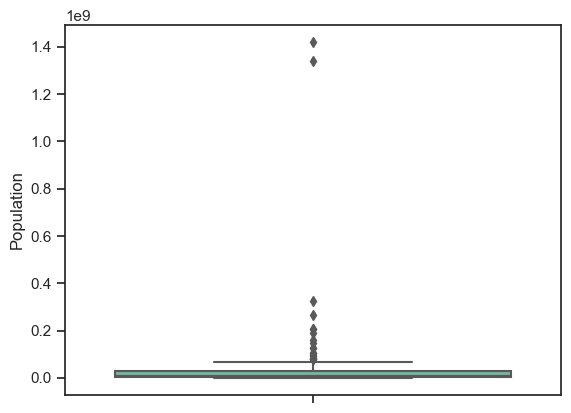

Dispo (Kcal/jour)


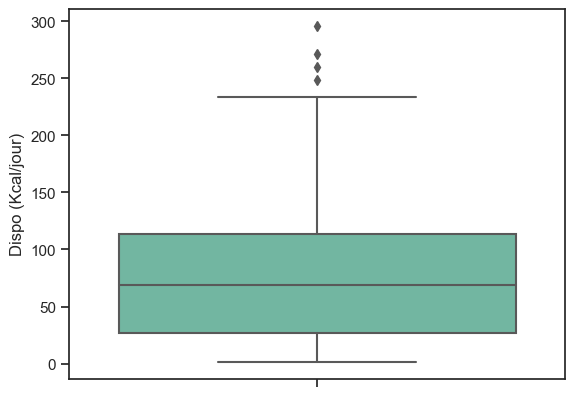

Dispo (kg/an)


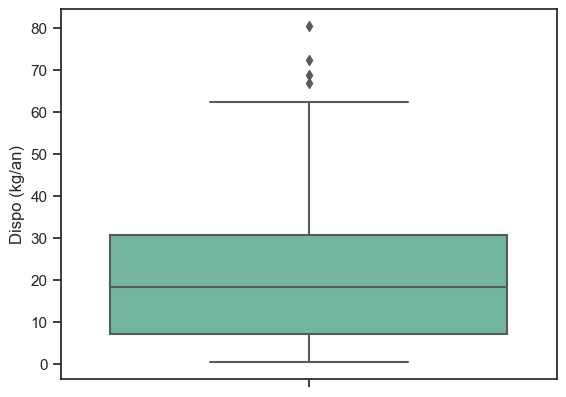

Dispo mat. grasses (g/jour)


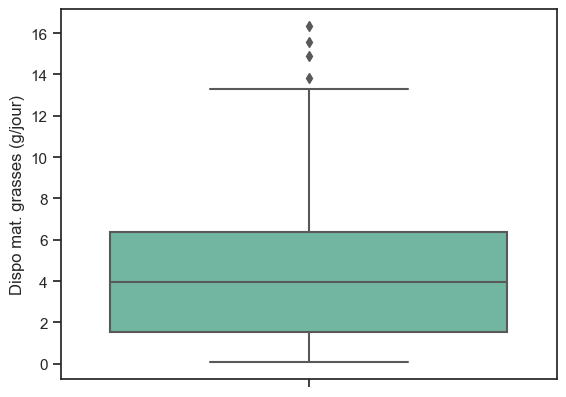

Dispo protéines (g/jour)


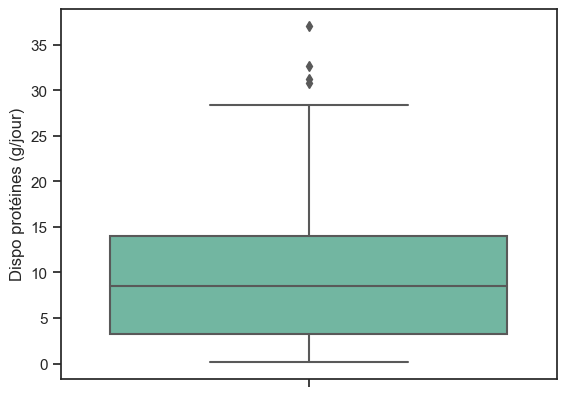

Dispo int.


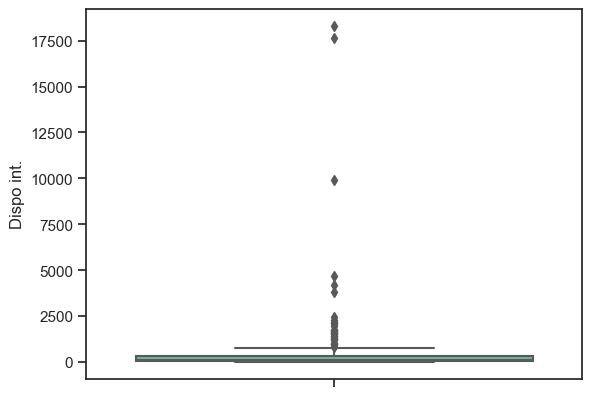

Import (qté)


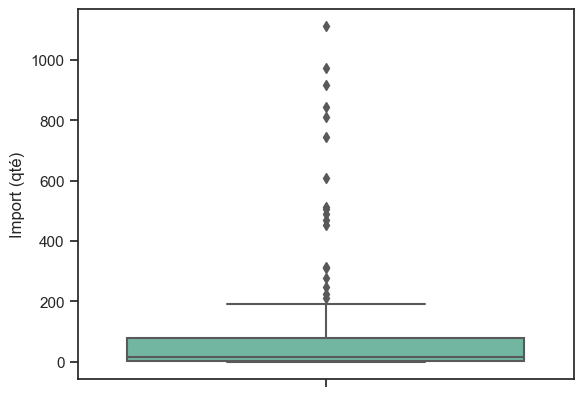

Export (qté)


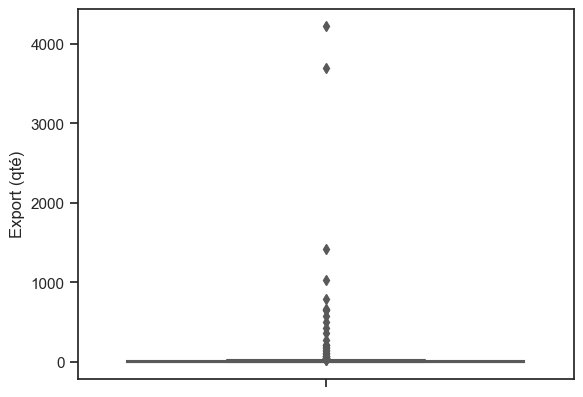

Nourriture


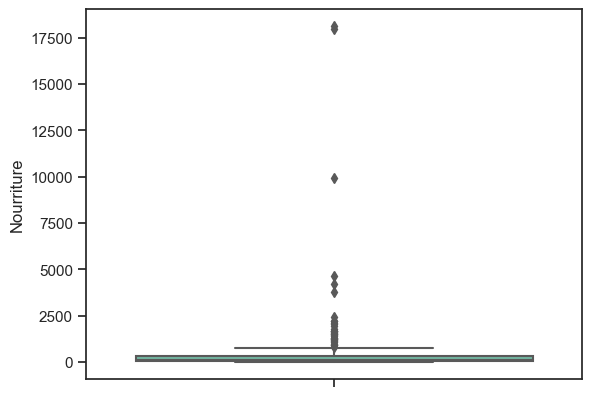

Production


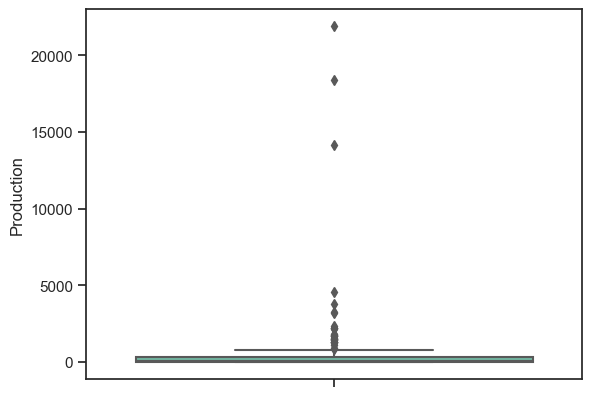

Résidus


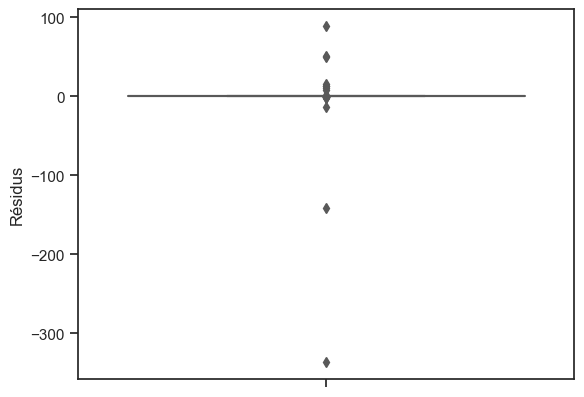

Variation de stock


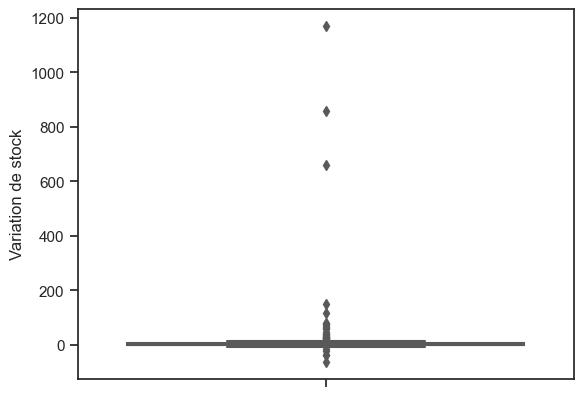

Dispo (hab)


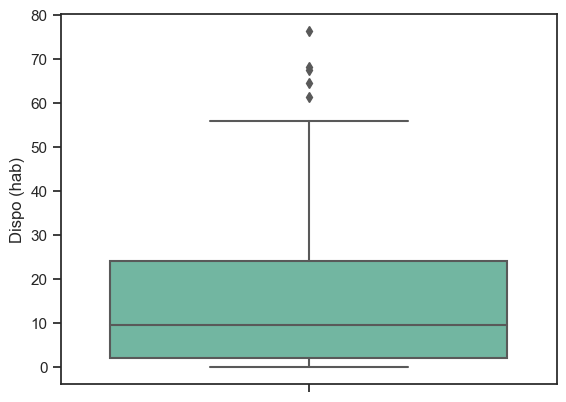

In [44]:
# Sélection des variables quantitatives
variables = bilan_pop_2017[['Population','Dispo (Kcal/jour)','Dispo (kg/an)','Dispo mat. grasses (g/jour)',
      'Dispo protéines (g/jour)','Dispo int.','Import (qté)', 'Export (qté)',
      'Nourriture', 'Production', 'Résidus', 'Variation de stock', 'Dispo (hab)']]

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in variables:
    print(var)
    sns.boxplot(y=var, data=variables, palette="Set2")
    plt.show()

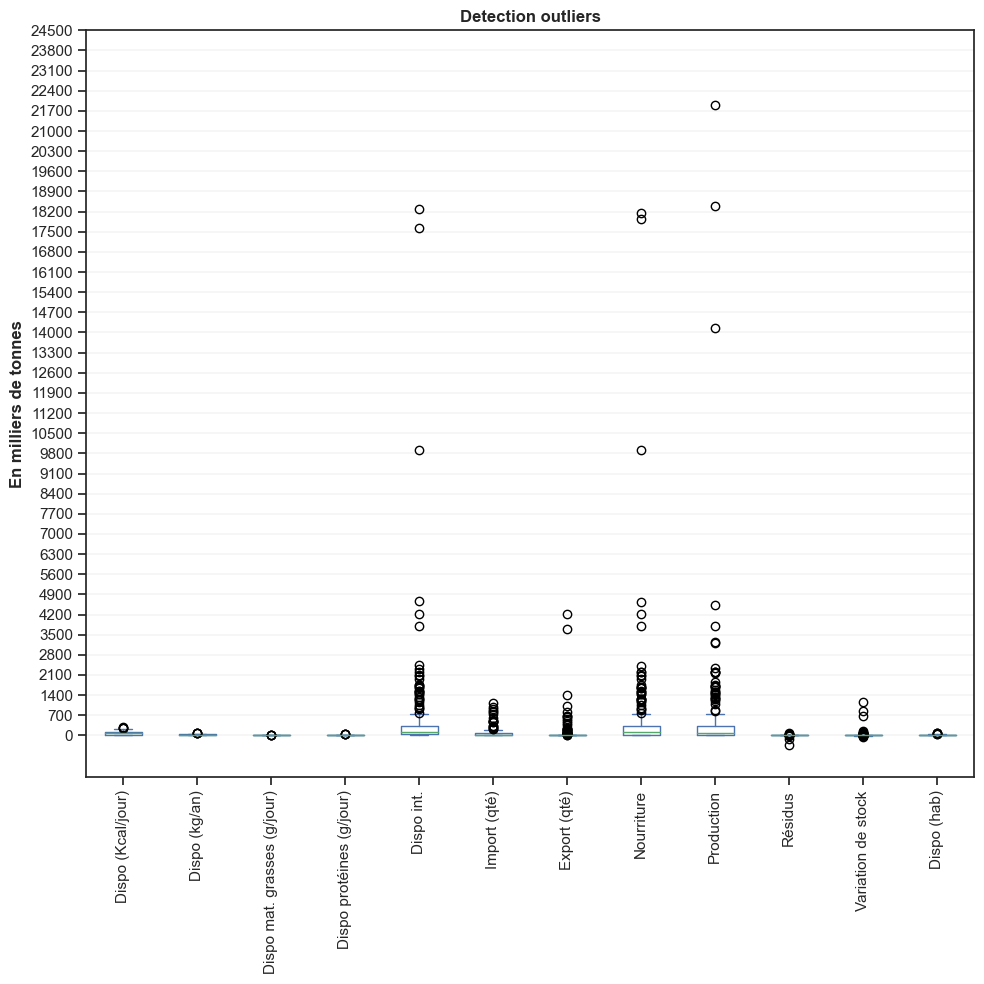

In [45]:
# Detection outliers
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
ax = bilan_pop_2017[['Dispo (Kcal/jour)','Dispo (kg/an)','Dispo mat. grasses (g/jour)',
                     'Dispo protéines (g/jour)','Dispo int.','Import (qté)', 'Export (qté)',
                     'Nourriture', 'Production', 'Résidus','Variation de stock', 'Dispo (hab)']].plot(kind='box', title='boxplot')
plt.title('Detection outliers',fontweight='bold')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 25_000, step = 700))
plt.ylabel('En milliers de tonnes', fontweight='bold')
plt.grid(axis = 'y', linewidth = 0.25)
plt.show()

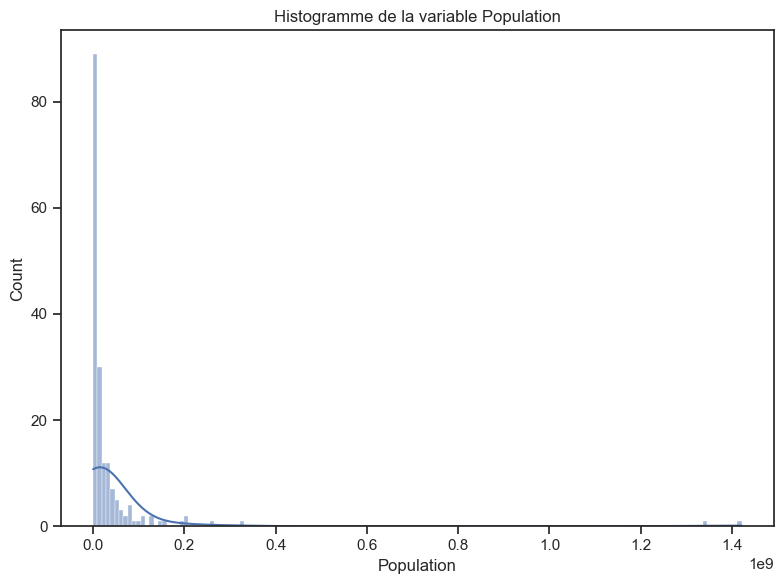

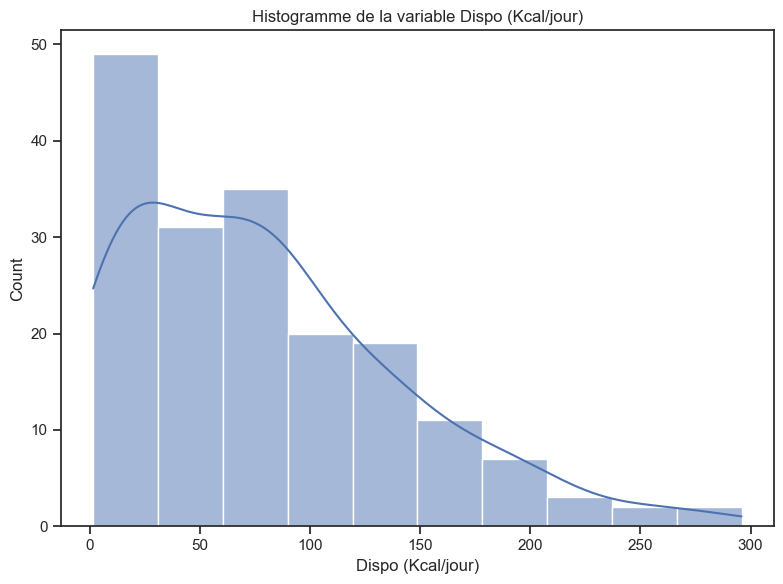

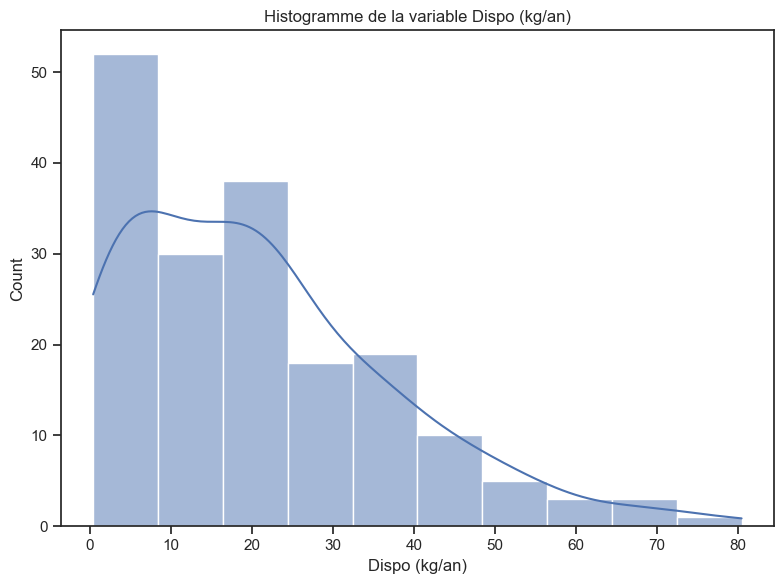

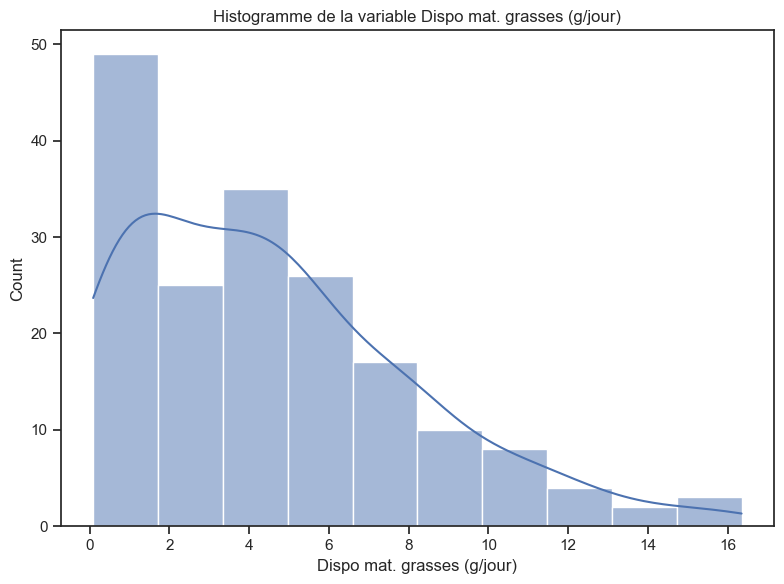

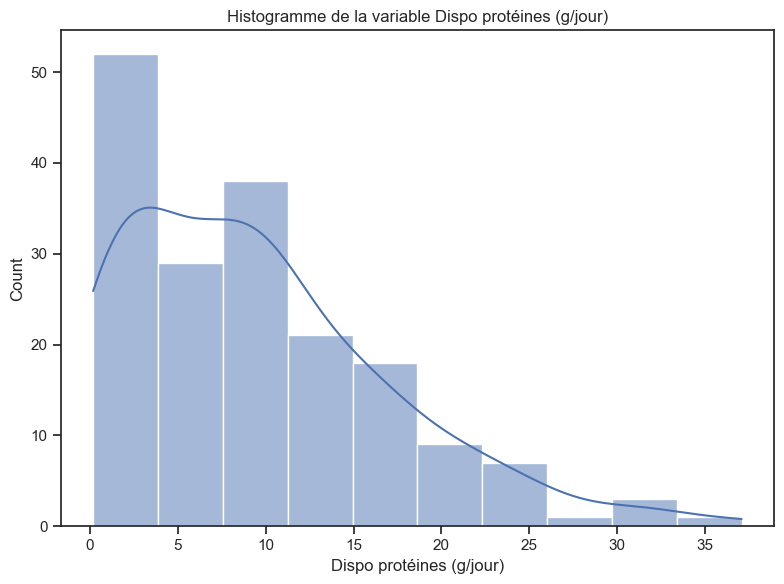

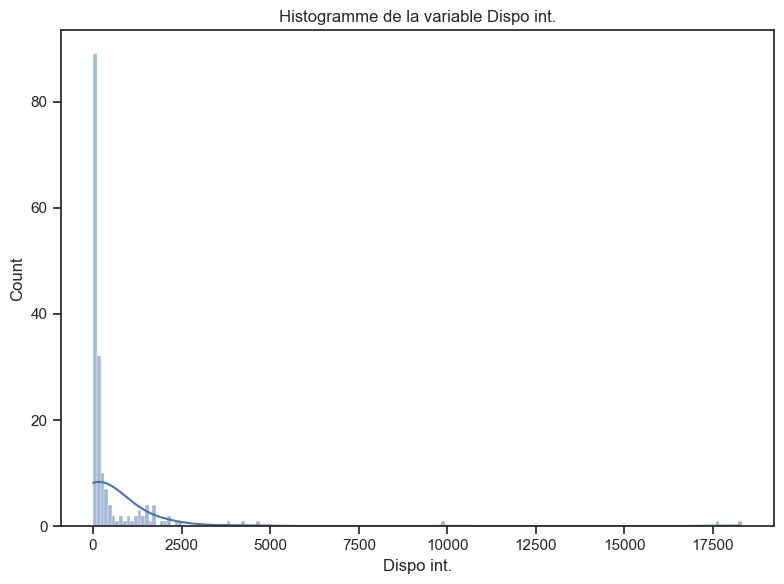

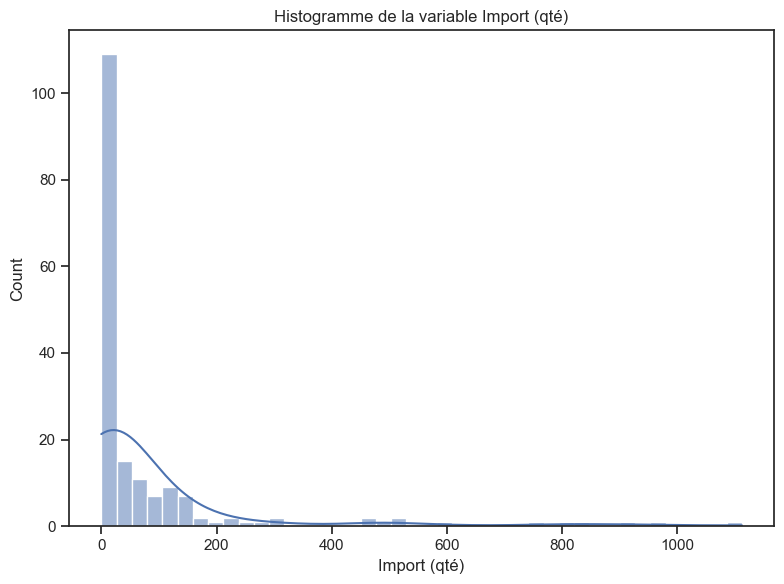

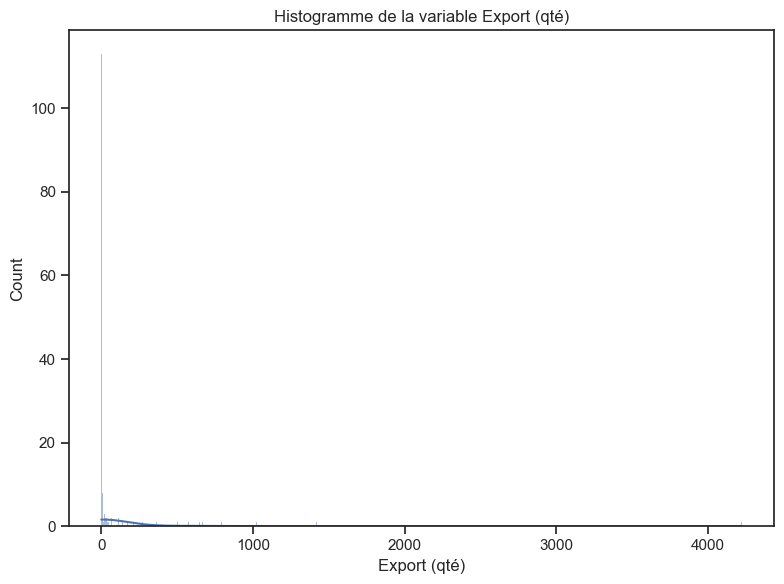

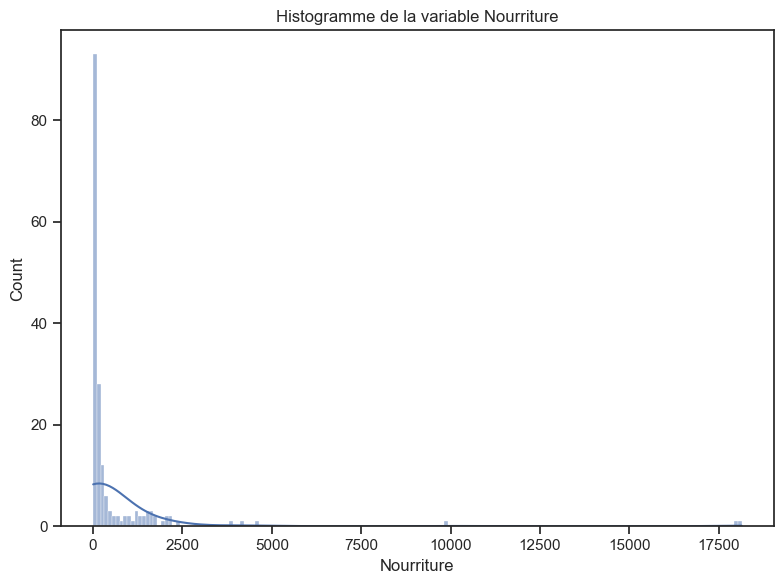

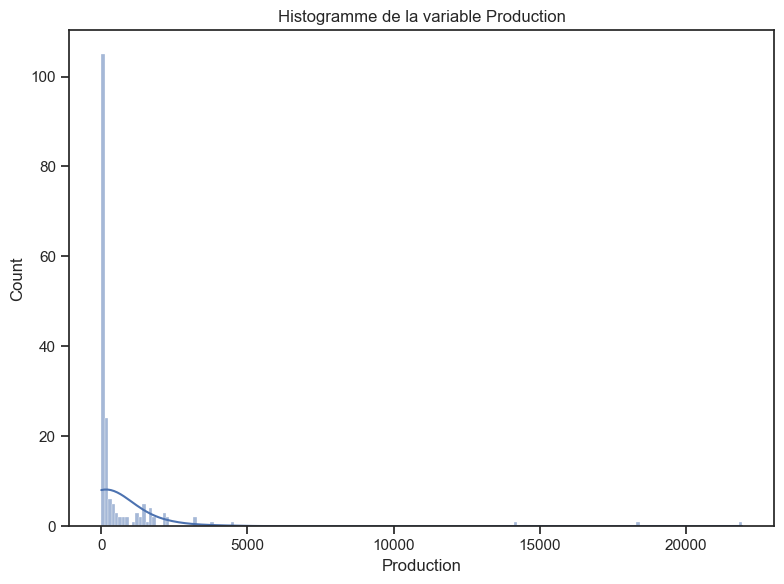

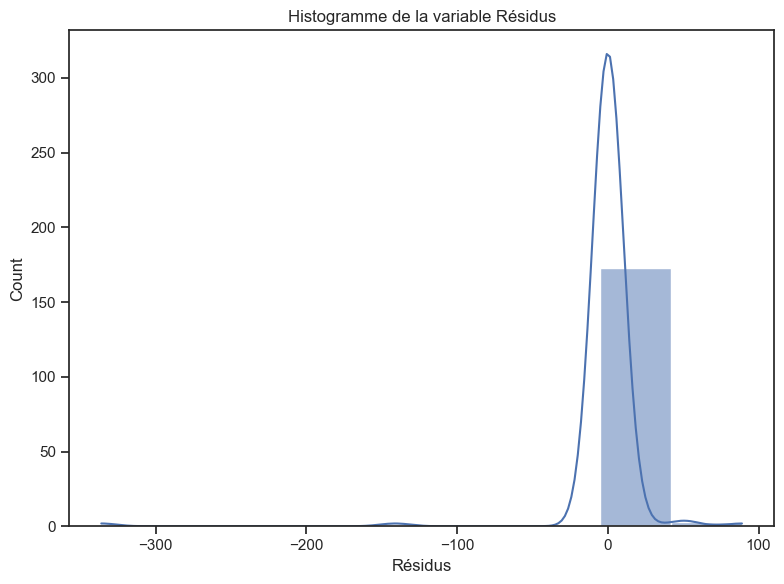

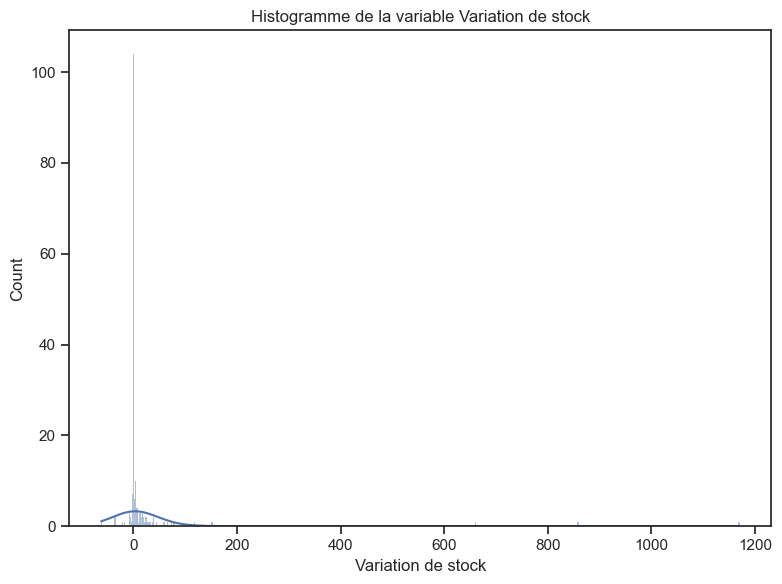

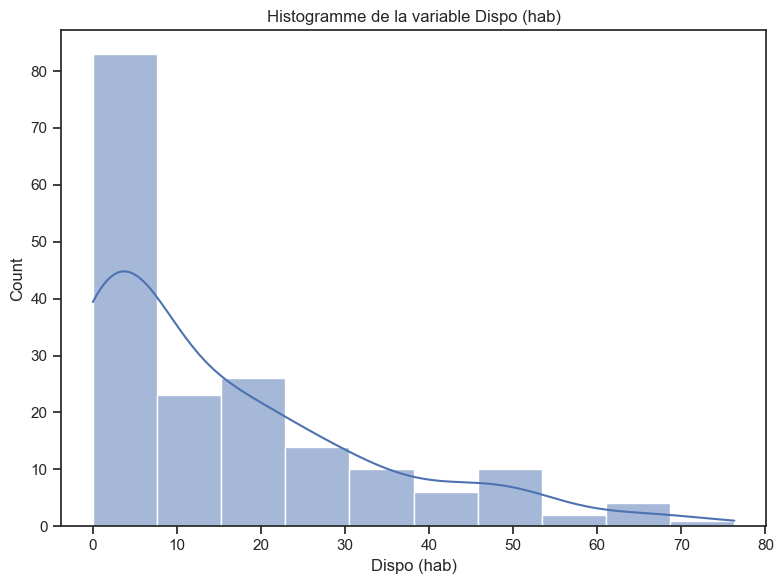

In [46]:
# Analyse de la normalité
from scipy.stats import shapiro

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=bilan_pop_2017, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

In [47]:
# Initialisation du DataFrame pour les résultats des tests de normalité
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in variables:
    stat, p = shapiro(variables[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normality': normality}, ignore_index=True)

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)

                       Variable       P-value   Normality
0                    Population  1.271180e-26  Not Normal
1             Dispo (Kcal/jour)  2.573513e-08  Not Normal
2                 Dispo (kg/an)  1.607768e-08  Not Normal
3   Dispo mat. grasses (g/jour)  3.797513e-08  Not Normal
4      Dispo protéines (g/jour)  1.499200e-08  Not Normal
5                    Dispo int.  8.940140e-26  Not Normal
6                  Import (qté)  2.216947e-22  Not Normal
7                  Export (qté)  8.197977e-27  Not Normal
8                    Nourriture  7.643177e-26  Not Normal
9                    Production  4.193100e-26  Not Normal
10                      Résidus  8.632072e-28  Not Normal
11           Variation de stock  3.596765e-27  Not Normal
12                  Dispo (hab)  6.996324e-13  Not Normal


Il faudra normaliser les données lors des analyses CAH et ACP.

<div style="background-color: RGB(217, 117, 26);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">V - Analyse bivariée</h2>
</div>

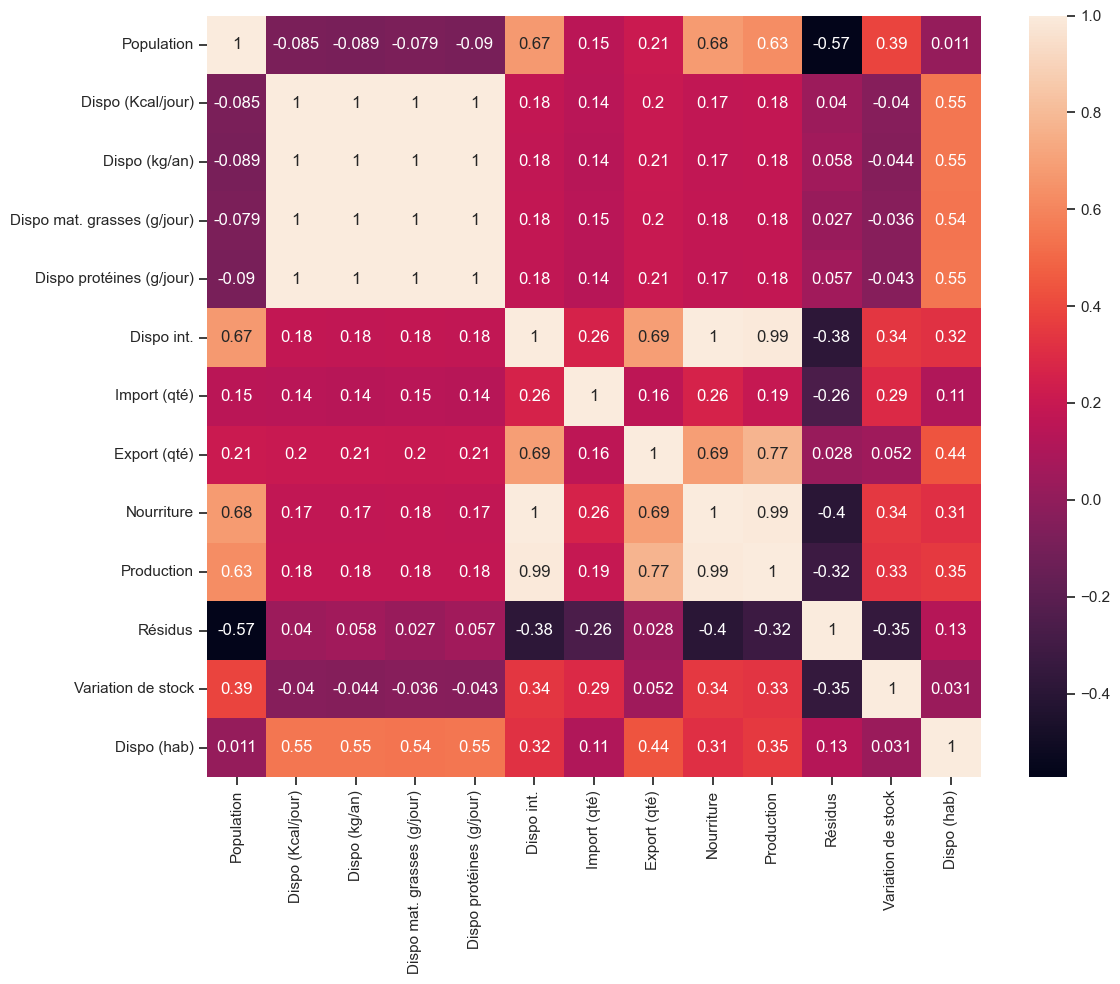

In [48]:
# Matrice des corrélations
corr_join = variables.corr(method="pearson")

# Visualiser la matrice
fig = plt.figure(figsize=(12, 10))
sns.heatmap(corr_join, annot=True)
plt.show()
fig.savefig('matrice_corr_1.png', dpi=300)

La matrice des corrélations nous permet de visualiser les corrélations entre les différentes
variables et ainsi nous aider dans le choix des variables pour le reste de l'analyse.
Ici on selectionne les variables "Production", "Nourriture", "Export", "Dispo par habitant" et "Dispo intérieure". 
On choisit également la variable "Dispo (kg/an)" pour les quatres variables fortement corrélées 
(elles ont toutes la même valeur donc on en garde qu'une). La notion d'importation est aussi importante malgré la faible corrélation avec les autres variables puisqu'elle concerne directement l'analyse à effectuer. La variable Population n'a pas de lien avec notre étude de marché et pourrait fausser les clusters du fait de l'hétérogénité de la distribution, nous l'écartons donc de nos variables.

In [49]:
bilan_pop_2017.to_csv(r"bilan_pop_2017.csv")